# This is a disability donation and distribution system ML implementation

In [20]:
#import machine learning libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OutputCodeClassifier
from sklearn.metrics import (f1_score, fbeta_score, matthews_corrcoef, log_loss,
                             ConfusionMatrixDisplay, confusion_matrix, classification_report,
                             make_scorer, balanced_accuracy_score, accuracy_score, roc_curve,
                             auc, recall_score, roc_auc_score, average_precision_score,
                             precision_score, precision_recall_curve)
from lightgbm import LGBMClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
import pickle
import os
import scipy.io #works with .mat files

In [21]:
#upload data
data = pd.read_csv('./synthetic_dataset.csv')

In [22]:
# displaying the data
data.head()

,Name,Age,Location,Latitude,Longitude,Financial Situation,Living Status,Occupation Status,Disability,School Issues,Family Size,Dependents,Medical Conditions,Monthly Income,Education Level,Language Proficiency,Talent,Highest Level of School Attained,Food Issues,Assistance Package
0,Person 1,24,Zimbabwe Rural Area,-15.8580,27.4486,unemployed,shelter,employed,physical disability,lack of access to proper education,6,4,2,33,secondary school,local language,artistic abilities,secondary school,nutritional deficiencies,Monetary Aid
1,Person 2,30,Zimbabwe Rural Area,-20.9932,28.6730,unemployed,homeless,unemployed,mental health condition,learning disabilities,5,2,3,377,university,bilingual,artistic abilities,primary school,food insecurity,Education and Skill Development
2,Person 3,63,Zimbabwe Rural Area,-19.4536,30.7794,unemployed,shelter,seeking employment,physical disability,learning disabilities,6,6,2,457,university,local language,artistic abilities,primary school,limited access to healthy food,Job Placement and Career Support
3,Person 4,57,Zimbabwe Rural Area,-15.6182,33.2944,unemployed,homeless,unemployed,visual impairment,lack of access to proper education,3,0,3,121,primary school,local language,technical skills,university,nutritional deficiencies,Basic Necessities
4,Person 5,21,Zimbabwe Rural Area,-15.9462,25.3362,below poverty line,temporary housing,unemployed,visual impairment,lack of access to proper education,5,5,0,333,primary school,local language,technical skills,university,food insecurity,Education and Skill Development


In [23]:
print(data.head())

       Name  Age             Location  Latitude  Longitude  \
0  Person 1   24  Zimbabwe Rural Area  -15.8580    27.4486   
1  Person 2   30  Zimbabwe Rural Area  -20.9932    28.6730   
2  Person 3   63  Zimbabwe Rural Area  -19.4536    30.7794   
3  Person 4   57  Zimbabwe Rural Area  -15.6182    33.2944   
4  Person 5   21  Zimbabwe Rural Area  -15.9462    25.3362   

  Financial Situation      Living Status   Occupation Status  \
0          unemployed            shelter            employed   
1          unemployed           homeless          unemployed   
2          unemployed            shelter  seeking employment   
3          unemployed           homeless          unemployed   
4  below poverty line  temporary housing          unemployed   

                Disability                       School Issues  Family Size  \
0      physical disability  lack of access to proper education            6   
1  mental health condition               learning disabilities            5   
2    

In [24]:
# checking for missing  values
data.isnull().sum()

Name                                0
Age                                 0
Location                            0
Latitude                            0
Longitude                           0
Financial Situation                 0
Living Status                       0
Occupation Status                   0
Disability                          0
School Issues                       0
Family Size                         0
Dependents                          0
Medical Conditions                  0
Monthly Income                      0
Education Level                     0
Language Proficiency                0
Talent                              0
Highest Level of School Attained    0
Food Issues                         0
Assistance Package                  0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Name                              10000 non-null  object 
 1   Age                               10000 non-null  int64  
 2   Location                          10000 non-null  object 
 3   Latitude                          10000 non-null  float64
 4   Longitude                         10000 non-null  float64
 5   Financial Situation               10000 non-null  object 
 6   Living Status                     10000 non-null  object 
 7   Occupation Status                 10000 non-null  object 
 8   Disability                        10000 non-null  object 
 9   School Issues                     10000 non-null  object 
 10  Family Size                       10000 non-null  int64  
 11  Dependents                        10000 non-null  int64  
 12  Medic

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,41.446600,13.784722,18.0000,29.000000,41.0000,53.000000,65.0000
Latitude,10000.0,-18.747683,1.894061,-22.0000,-20.403525,-18.7517,-17.084650,-15.5004
Longitude,10000.0,29.507148,2.600230,25.0027,27.259025,29.5263,31.803325,33.9987
Family Size,10000.0,3.499700,1.709530,1.0000,2.000000,3.0000,5.000000,6.0000
Dependents,10000.0,1.738700,1.593260,0.0000,0.000000,1.0000,3.000000,6.0000
Medical Conditions,10000.0,1.497600,1.116834,0.0000,1.000000,1.0000,2.000000,3.0000
Monthly Income,10000.0,252.724000,144.654147,0.0000,126.000000,254.0000,380.000000,500.0000


In [27]:
# checking data statistics
data.describe() # this function will describe the data for numerical values only this 'age'

,Age,Latitude,Longitude,Family Size,Dependents,Medical Conditions,Monthly Income
count,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,41.446600,-18.747683,29.507148,3.49970,1.73870,1.497600,252.724000
std,13.784722,1.894061,2.600230,1.70953,1.59326,1.116834,144.654147
min,18.000000,-22.000000,25.002700,1.00000,0.00000,0.000000,0.000000
25%,29.000000,-20.403525,27.259025,2.00000,0.00000,1.000000,126.000000
50%,41.000000,-18.751700,29.526300,3.00000,1.00000,1.000000,254.000000
75%,53.000000,-17.084650,31.803325,5.00000,3.00000,2.000000,380.000000
max,65.000000,-15.500400,33.998700,6.00000,6.00000,3.000000,500.000000


In [28]:
# this is our target
# we need to know the specific need of a person hence better donation
data['Assistance Package'].value_counts()

Assistance Package
Basic Necessities                        1724
Monetary Aid                             1695
Education and Skill Development          1664
Job Placement and Career Support         1651
Healthcare Support                       1640
Mental Health and Counseling Services    1626
Name: count, dtype: int64

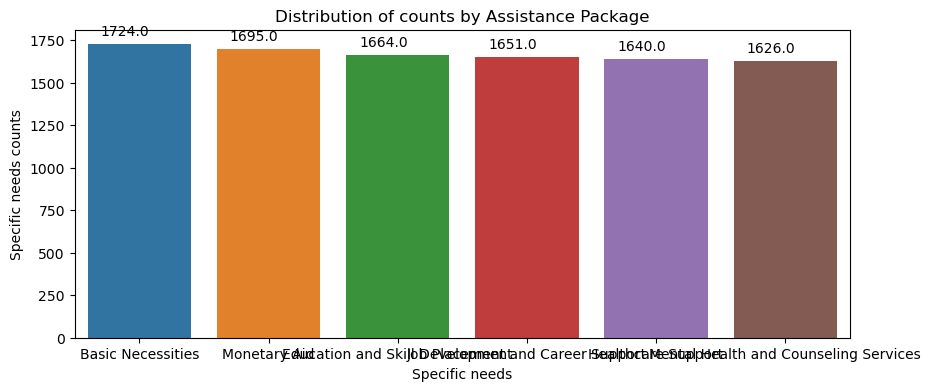

In [29]:
plt.figure(figsize = (10,4))
ax = sns.countplot(x = 'Assistance Package', data = data,
                   order = data['Assistance Package'].value_counts().index)
plt.title('Distribution of counts by Assistance Package')
plt.xlabel('Specific needs')
plt.ylabel('Specific needs counts')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()),
                (p.get_x()+0.1, p.get_height()+50))

In [30]:
import plotly.express as px

# Assuming you have a DataFrame called 'dataCat' with a column named 'specific_needs'
fig = px.bar(data,
             x='Assistance Package',
             title='Distribution of counts by Assistance Package')

# Customize the figure
fig.update_layout(
    xaxis_title='Assistance Package',
    yaxis_title='Specific needs counts',
    xaxis={'categoryorder': 'total descending'},
    width=500,
    height=400
)

# Show the plot
fig.show()


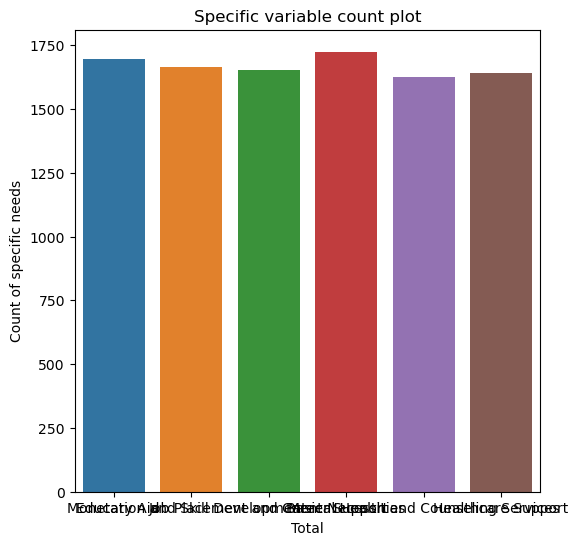

In [31]:
plt.figure(figsize = (6, 6))
sns.countplot(x = 'Assistance Package', data = data)
plt.xlabel('Total')
plt.ylabel('Count of specific needs')
plt.title('Specific variable count plot')
plt.show()

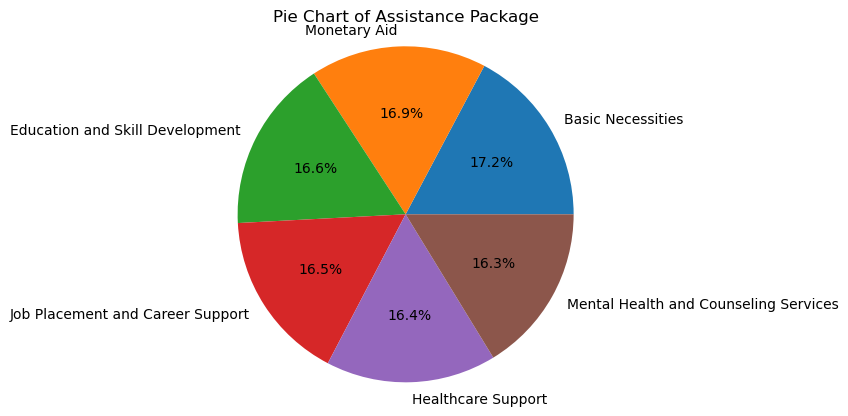

In [ ]:
# column for the pie chart
column_name = 'Assistance Package'  

# Calculate the count of each unique value in the specified column
value_counts = data[column_name].value_counts()

# Plot the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of {}'.format(column_name))
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Training on ml Algorithm

In [ ]:
data.head()

,Name,Age,Location,Latitude,Longitude,Financial Situation,Living Status,Occupation Status,Disability,School Issues,Family Size,Dependents,Medical Conditions,Monthly Income,Education Level,Language Proficiency,Talent,Highest Level of School Attained,Food Issues,Assistance Package
0,Person 1,24,Zimbabwe Rural Area,-15.8580,27.4486,unemployed,shelter,employed,physical disability,lack of access to proper education,6,4,2,33,secondary school,local language,artistic abilities,secondary school,nutritional deficiencies,Monetary Aid
1,Person 2,30,Zimbabwe Rural Area,-20.9932,28.6730,unemployed,homeless,unemployed,mental health condition,learning disabilities,5,2,3,377,university,bilingual,artistic abilities,primary school,food insecurity,Education and Skill Development
2,Person 3,63,Zimbabwe Rural Area,-19.4536,30.7794,unemployed,shelter,seeking employment,physical disability,learning disabilities,6,6,2,457,university,local language,artistic abilities,primary school,limited access to healthy food,Job Placement and Career Support
3,Person 4,57,Zimbabwe Rural Area,-15.6182,33.2944,unemployed,homeless,unemployed,visual impairment,lack of access to proper education,3,0,3,121,primary school,local language,technical skills,university,nutritional deficiencies,Basic Necessities
4,Person 5,21,Zimbabwe Rural Area,-15.9462,25.3362,below poverty line,temporary housing,unemployed,visual impairment,lack of access to proper education,5,5,0,333,primary school,local language,technical skills,university,food insecurity,Education and Skill Development


In [35]:
#lets drop the name and age they are not relevant
data = data.drop(columns = ['Name', 'Location', 'Latitude', 'Longitude'])
data.head()

,Age,Financial Situation,Living Status,Occupation Status,Disability,School Issues,Family Size,Dependents,Medical Conditions,Monthly Income,Education Level,Language Proficiency,Talent,Highest Level of School Attained,Food Issues,Assistance Package
0,24,2,1,0,1,1,6,4,2,33,2,2,0,2,2,Monetary Aid
1,30,2,0,2,0,2,5,2,3,377,3,1,0,1,0,Education and Skill Development
2,63,2,1,1,1,2,6,6,2,457,3,2,0,1,1,Job Placement and Career Support
3,57,2,0,2,2,1,3,0,3,121,1,2,2,3,2,Basic Necessities
4,21,0,2,2,2,1,5,5,0,333,1,2,2,3,0,Education and Skill Development


In [36]:
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to label encode
categorical_cols = ['Financial Situation', 'Living Status', 'Occupation Status', 'Disability', 'School Issues',
                    'Education Level', 'Language Proficiency', 'Talent', 'Highest Level of School Attained',
                    'Food Issues']

# Create an instance of the LabelEncoder
le = LabelEncoder()

# Apply label encoding to the categorical columns
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Print the updated dataset
print(data)

      Age  Financial Situation  Living Status  Occupation Status  Disability  \
0      24                    2              1                  0           1   
1      30                    2              0                  2           0   
2      63                    2              1                  1           1   
3      57                    2              0                  2           2   
4      21                    0              2                  2           2   
...   ...                  ...            ...                ...         ...   
9995   53                    0              0                  0           0   
9996   61                    1              1                  2           2   
9997   64                    0              1                  0           1   
9998   51                    0              1                  2           0   
9999   60                    0              0                  0           1   

      School Issues  Family Size  Depen

In [37]:
print(data['Assistance Package'])

0                           Monetary Aid
1        Education and Skill Development
2       Job Placement and Career Support
3                      Basic Necessities
4        Education and Skill Development
                      ...               
9995                        Monetary Aid
9996    Job Placement and Career Support
9997                   Basic Necessities
9998    Job Placement and Career Support
9999     Education and Skill Development
Name: Assistance Package, Length: 10000, dtype: object


In [38]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['Assistance Package'])
y = data['Assistance Package']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [40]:

from sklearn.ensemble import RandomForestClassifier

# Reshape the target variables
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.1706060606060606


### lets implement the ML algorithim 
### we will do SVM and Random forest you can add some algorithms as you need

In [43]:
# Split the data into features (X) and target variable (y)
#X = data.drop('specific_needs', axis=1)  # specific_needs column will be our target variable
X = data.iloc[:, 0:-1]
Y = data.iloc[:,-1]
#y = data['specific_needs']

In [44]:
print(Y)

0                           Monetary Aid
1        Education and Skill Development
2       Job Placement and Career Support
3                      Basic Necessities
4        Education and Skill Development
                      ...               
9995                        Monetary Aid
9996    Job Placement and Career Support
9997                   Basic Necessities
9998    Job Placement and Career Support
9999     Education and Skill Development
Name: Assistance Package, Length: 10000, dtype: object


In [45]:
print(X)

      Age  Financial Situation  Living Status  Occupation Status  Disability  \
0      24                    2              1                  0           1   
1      30                    2              0                  2           0   
2      63                    2              1                  1           1   
3      57                    2              0                  2           2   
4      21                    0              2                  2           2   
...   ...                  ...            ...                ...         ...   
9995   53                    0              0                  0           0   
9996   61                    1              1                  2           2   
9997   64                    0              1                  0           1   
9998   51                    0              1                  2           0   
9999   60                    0              0                  0           1   

      School Issues  Family Size  Depen

In [56]:
fin = data.value_counts('Financial Situation')
fin

Financial Situation
1    3369
2    3320
0    3311
Name: count, dtype: int64

In [46]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [47]:
# Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict using Random Forest
y_pred_rf = random_forest.predict(X_test)

# Calculate accuracy for Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.169


In [49]:
print(y_pred)

['Mental Health and Counseling Services'
 'Mental Health and Counseling Services' 'Healthcare Support' ...
 'Healthcare Support' 'Monetary Aid' 'Education and Skill Development']


In [50]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict using K-Nearest Neighbors
y_pred_knn = knn.predict(X_test)

# Calculate accuracy for K-Nearest Neighbors
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)

K-Nearest Neighbors Accuracy: 0.1765


In [51]:
#Training the svm Model
from sklearn import svm
classifier = svm.SVC(kernel='linear')
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

#Model Evaluation

# getting Accuracy Score
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.187875


In [52]:
#saving models
filename = 'Random forest Model.pkl'
pickle.dump(random_forest, open(filename, 'wb'))

In [53]:
#saving model knn
filename = 'KNeighbors Model.pkl'
pickle.dump(knn, open(filename, 'wb'))

In [54]:
#saving models
filename = 'SVM Model.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [57]:
#check values
check = pd.read_csv("./synthetic_dataset.csv")

In [58]:
check.head()

,Name,Age,Location,Latitude,Longitude,Financial Situation,Living Status,Occupation Status,Disability,School Issues,Family Size,Dependents,Medical Conditions,Monthly Income,Education Level,Language Proficiency,Talent,Highest Level of School Attained,Food Issues,Assistance Package
0,Person 1,24,Zimbabwe Rural Area,-15.8580,27.4486,unemployed,shelter,employed,physical disability,lack of access to proper education,6,4,2,33,secondary school,local language,artistic abilities,secondary school,nutritional deficiencies,Monetary Aid
1,Person 2,30,Zimbabwe Rural Area,-20.9932,28.6730,unemployed,homeless,unemployed,mental health condition,learning disabilities,5,2,3,377,university,bilingual,artistic abilities,primary school,food insecurity,Education and Skill Development
2,Person 3,63,Zimbabwe Rural Area,-19.4536,30.7794,unemployed,shelter,seeking employment,physical disability,learning disabilities,6,6,2,457,university,local language,artistic abilities,primary school,limited access to healthy food,Job Placement and Career Support
3,Person 4,57,Zimbabwe Rural Area,-15.6182,33.2944,unemployed,homeless,unemployed,visual impairment,lack of access to proper education,3,0,3,121,primary school,local language,technical skills,university,nutritional deficiencies,Basic Necessities
4,Person 5,21,Zimbabwe Rural Area,-15.9462,25.3362,below poverty line,temporary housing,unemployed,visual impairment,lack of access to proper education,5,5,0,333,primary school,local language,technical skills,university,food insecurity,Education and Skill Development


In [67]:
check.value_counts('Medical Conditions')

Medical Conditions
1    2516
0    2498
2    2498
3    2488
Name: count, dtype: int64

In [69]:
import folium

# Create a map centered around the mean of coordinates
map_center = [check['Latitude'].mean(), check['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=10)

# Add markers for each coordinate
for index, row in check.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']]).add_to(m)

# Display the map
m